<a href="https://colab.research.google.com/github/XAheli/Spectrums/blob/main/Spectrums.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

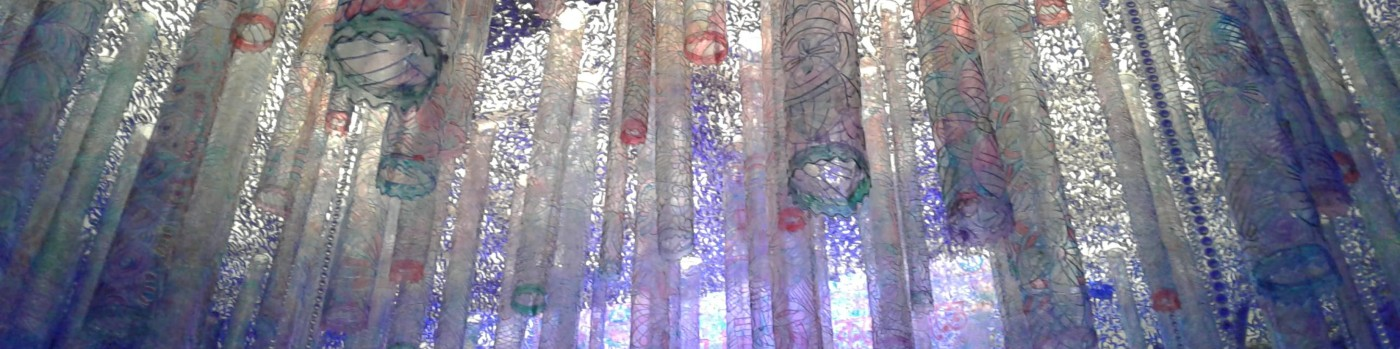

# **Spectrums: Color Palette Generator**
*By Aheli ⛵*

*Spectrums is a Python utility that allows you to create beautiful color palettes based on an input image. This project was created as a practice exercise to gain a deeper understanding of Gaussian Mixture Models (GMMs) and color analysis. It uses GMMs to cluster colors from an image and presents them in a visually appealing palette.*

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving IMG_1969 copy.jpg to IMG_1969 copy (1).jpg


In [ ]:
image_path = "IMG_1969 copy.jpg"


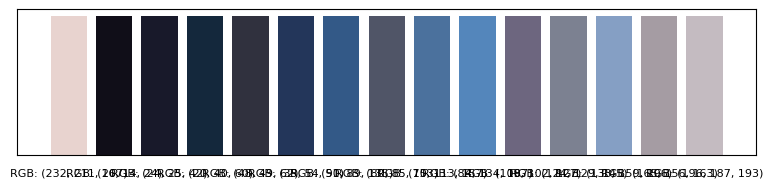

In [ ]:
import colorsys
import io
import math
import numpy as np
from PIL import Image
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

PALETTE_WIDTH = 900
PALETTE_HEIGHT = 300
MAX_SIZE = 600, 600

def make_palette(file, n_clusters):
    im = Image.open(file)
    im.thumbnail(MAX_SIZE)
    pixels = np.array([im.getpixel((x, y)) for x in range(0, im.size[0]) for y in range(0, im.size[1])])

    gmm = GaussianMixture(n_components=n_clusters, random_state=0)
    gmm.fit(pixels)

    return [[int(round(i)) for i in color] for color in gmm.means_]

## Calculates perceived brightness for the given RGB values. (https://www.w3.org/TR/AERT/#color-contrast)

def perceived_brightness(r, g, b):
    # Defining custom coefficients here
    custom_r_coeff = 0.299
    custom_g_coeff = 0.587
    custom_b_coeff = 0.114

    # Calculating perceived brightness using custom coefficients
    return math.sqrt((custom_r_coeff * r * r) + (custom_g_coeff * g * g) + (custom_b_coeff * b * b))

def hsp_rank(r, g, b, mult=8):

## The purpose of this code is to create a custom ranking for colors based on their hue, saturation, and perceived brightness.
## The adjustments to h and s ensure that the sorting is influenced by both color characteristics and brightness, creating a more visually pleasing and meaningful ordering of colors.
    lum = perceived_brightness(r, g, b)
    h, s, v = colorsys.rgb_to_hsv(r, g, b)

    return (h * lum * mult, s * lum * mult, s * mult)

def main(image_path, num_colors):
    cluster_centers = make_palette(image_path, num_colors)
    cluster_centers.sort(key=lambda rgb: hsp_rank(*rgb))

    # Extract RGB values from the cluster centers
    colors_rgb = [tuple(color) for color in cluster_centers]

    # Create a bar plot to visualize the colors
    plt.figure(figsize=(8, 2))
    for i, color in enumerate(colors_rgb):
        plt.bar(i, 1, color=[c / 255 for c in color])
        plt.text(i, -0.15, f'RGB: {color}', fontsize=8, ha='center')
    # Remove x and y ticks and labels
    plt.xticks([])
    plt.yticks([])

    plt.tight_layout()
    plt.show()


# Set your image path and number of colors here
num_colors = 15

main(image_path, num_colors)
